In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
iris=load_iris()
x=iris.data
y=iris.target
y=y.reshape(-1,1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
scaler=StandardScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)

In [ ]:
y_train_oh=tf.keras.utils.to_categorical(y_train,num_classes=3)
y_test_oh=tf.keras.utils.to_categorical(y_test,num_classes=3)

In [ ]:
from tensorflow.keras.regularizers import l2
model=tf.keras.Sequential([tf.keras.layers.Dense(64,activation='relu',input_dim=4,
                                                 kernel_regularizer=l2(0.001)),
                           tf.keras.layers.Dense(32,activation='relu'),
                           tf.keras.layers.Dense(3,activation='softmax')])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
epoch=100
a=model.fit(x_train_sc,y_train_oh,epochs=epoch,batch_size=32,validation_split=0.1)

In [ ]:
loss,accuracy=model.evaluate(x_test_sc,y_test_oh)
print(f'test loss:{loss:.4f}')
print(f'accuracy:{accuracy:.4f}')

1/1 [==============================] - 0s 54ms/step - loss: 0.0593 - accuracy: 1.0000
test loss:0.0593
accuracy:1.0000


In [ ]:
model2=tf.keras.Sequential([tf.keras.layers.Dense(64,activation='relu',input_dim=4),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(32,activation='relu'),
                            tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(3,activation='softmax')])

In [ ]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
epoch=100
a=model2.fit(x_train_sc,y_train_oh,epochs=epoch,batch_size=32,validation_split=0.1)

In [ ]:
loss,accuracy=model2.evaluate(x_test_sc,y_test_oh)
print(f'test loss:{loss:.4f}')
print(f'accuracy:{accuracy:.4f}')

1/1 [==============================] - 0s 28ms/step - loss: 0.0683 - accuracy: 1.0000
test loss:0.0683
accuracy:1.0000


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
b=model2.fit(x_train_sc,y_train_oh,epochs=epoch,batch_size=32,validation_split=0.1,
             callbacks=[early_stopping])

In [ ]:
loss,accuracy=model2.evaluate(x_test_sc,y_test_oh)
print(f'test loss:{loss:.4f}')
print(f'accuracy:{accuracy:.4f}')

1/1 [==============================] - 0s 27ms/step - loss: 0.0648 - accuracy: 1.0000
test loss:0.0648
accuracy:1.0000


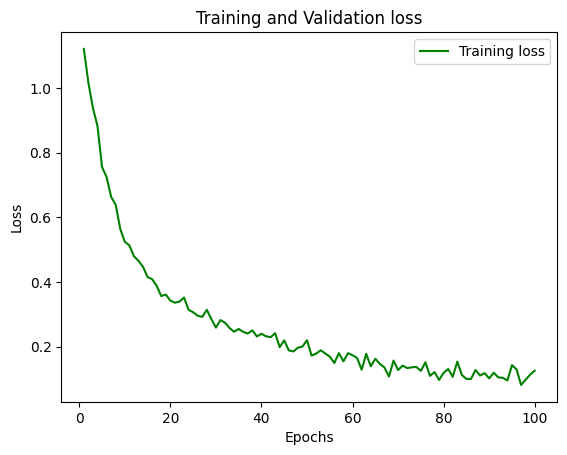

In [ ]:
import matplotlib.pyplot as plt
loss_val = a.history['loss']
epochs = range(1,101)
plt.plot(epochs, loss_val, 'g', label='Training loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

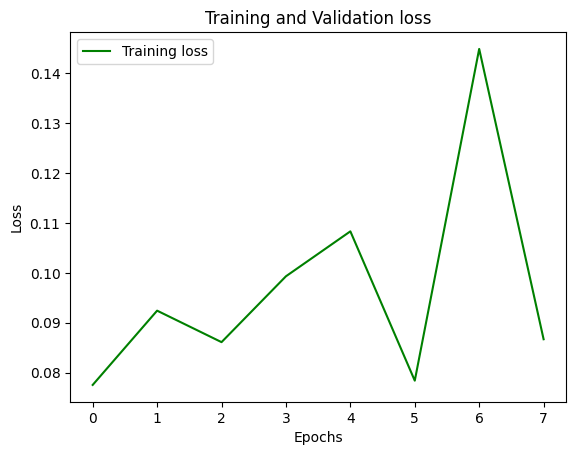

In [ ]:
loss_val = b.history['loss']
epochs = range(0,8)
plt.plot(epochs, loss_val, 'g', label='Training loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()